Introduction
Image Classification
* LeNet Architecture
* Classify different Traffic signs of 43 Classes

- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun :
[pdf](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

Load Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train,y_train = train['features'] , train['labels']
X_validation, y_validation = valid['features'] , valid['labels']
X_test , y_test = test['features'] , test['labels']

In [4]:
#checking shape
X_train.shape,y_train.shape,X_validation.shape,y_validation.shape,X_test.shape,y_test.shape

((34799, 32, 32, 3),
 (34799,),
 (4410, 32, 32, 3),
 (4410,),
 (12630, 32, 32, 3),
 (12630,))

Image Exploration

In [5]:
class_dict = {0:'Speed limit (20km/h)', 1:'Speed limit (30km/h)',2:'Speed limit (50km/h)',
3:'Speed limit (60km/h)',4:'Speed limit (70km/h)',5:'Speed limit (80km/h)',6:'End of speed limit (80km/h)',
7:'Speed limit (100km/h)',8:'Speed limit (120km/h)',9:'No passing',10:'No passing for vehicles over 3.5 metric tons',
11:'Right-of-way at the next intersection',12:'Priority road',13:'Yield',14:'Stop',15:'No vehicles',
16:'Vehicles over 3.5 metric tons prohibited',17:'No entry',18:'General caution',19:'Dangerous curve to the left',
20:'Dangerous curve to the right',21:'Double curve',22:'Bumpy road',23:'Slippery road',24:'Road narrows on the right',
25:'Road work',26:'Traffic signals',27:'Pedestrians',28:'Children crossing',29:'Bicycles crossing',
30:'Beware of ice/snow',31:'Wild animals crossing',32:'End of all speed and passing limits',33:'Turn right ahead',
34:'Turn left ahead',35:'Ahead only',36:'Go straight or right',37:'Keep right',38:'Keep right',39:'Keep left',
40:'Roundabout mandatory',41:'End of no passing',42:'End of no passing by vehicles over 3.5 metric tons'}

Speed limit (20km/h)


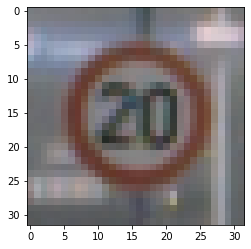

In [6]:
i = 10001
plt.imshow(X_train[i])
print(class_dict[y_train[i]])

Speed limit (100km/h)


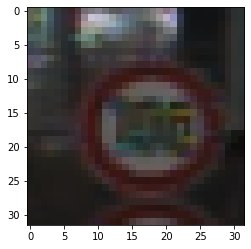

In [7]:
i = 6189
plt.imshow(X_test[i])
print(class_dict[y_test[i]])

Go straight or right


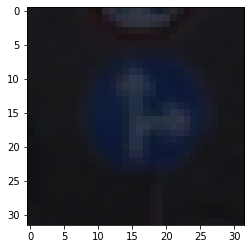

In [8]:
i = 122
plt.imshow(X_validation[i])
print(class_dict[y_validation[i]])

Data Preparation

In [9]:
#shuffle the order of the images
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [10]:
#Black and white
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

In [11]:
X_train_gray.shape,X_test_gray.shape,X_validation_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [12]:
#Normalization
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128

No passing


<Figure size 432x288 with 0 Axes>

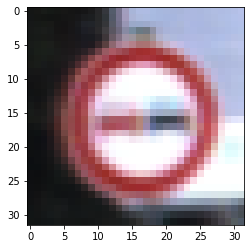

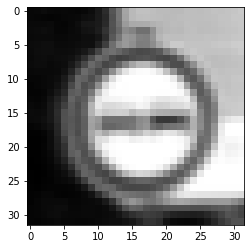

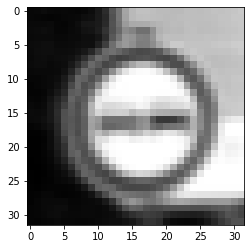

<Figure size 432x288 with 0 Axes>

In [13]:
i = 6832
plt.imshow(X_train[i].squeeze(),cmap='gray')
print(class_dict[y_train[i]])
plt.figure()
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')
plt.figure()

Model Training

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [15]:
#skeleton of network
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape =(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation='softmax')) #cant use relu activation function since our op should be categoral instrad we can use sigmoid or softmax

In [16]:
#compile model
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

c:\Users\H504133\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
#model training / feeding the data to the model
history = cnn_model.fit(X_train_gray_norm,y_train,batch_size=500,epochs= 50,verbose = 1,validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 16s 224ms/step - loss: 3.2210 - accuracy: 0.1606 - val_loss: 2.9239 - val_accuracy: 0.2615
Epoch 2/50
70/70 [==============================] - 14s 198ms/step - loss: 1.8984 - accuracy: 0.4839 - val_loss: 1.5120 - val_accuracy: 0.5494
Epoch 3/50
70/70 [==============================] - 13s 193ms/step - loss: 0.9879 - accuracy: 0.7181 - val_loss: 0.9689 - val_accuracy: 0.6893
Epoch 4/50
70/70 [==============================] - 13s 181ms/step - loss: 0.6548 - accuracy: 0.8221 - val_loss: 0.7439 - val_accuracy: 0.7667
Epoch 5/50
70/70 [==============================] - 13s 179ms/step - loss: 0.5070 - accuracy: 0.8653 - val_loss: 0.6793 - val_accuracy: 0.8016
Epoch 6/50
70/70 [==============================] - 16s 222ms/step - loss: 0.4131 - accuracy: 0.8915 - val_loss: 0.6188 - val_accuracy: 0.8095
Epoch 7/50
70/70 [==============================] - 15s 219ms/step - loss: 0.3384 - accuracy: 0.9148 - val_loss: 0.5992 - val_accuracy: 0.8236

Model Evaluation

In [20]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print("Accuracy: {}".format(score[1]*100))

395/395 [==============================] - 3s 8ms/step - loss: 1.3569 - accuracy: 0.8676
Accuracy: 86.76167726516724


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
#displaying accuracy
accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

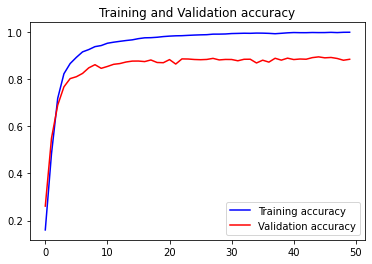

In [29]:
#accuracy
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

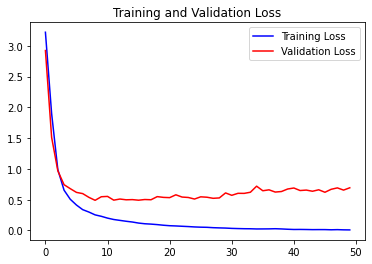

In [30]:
#loss
epochs = range(len(loss))
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [47]:
#predicting on test data
predicted_classes = np.argmax(cnn_model.predict(X_test_gray_norm), axis=1)
y_true = y_test

395/395 [==============================] - 1s 3ms/step


<AxesSubplot:>

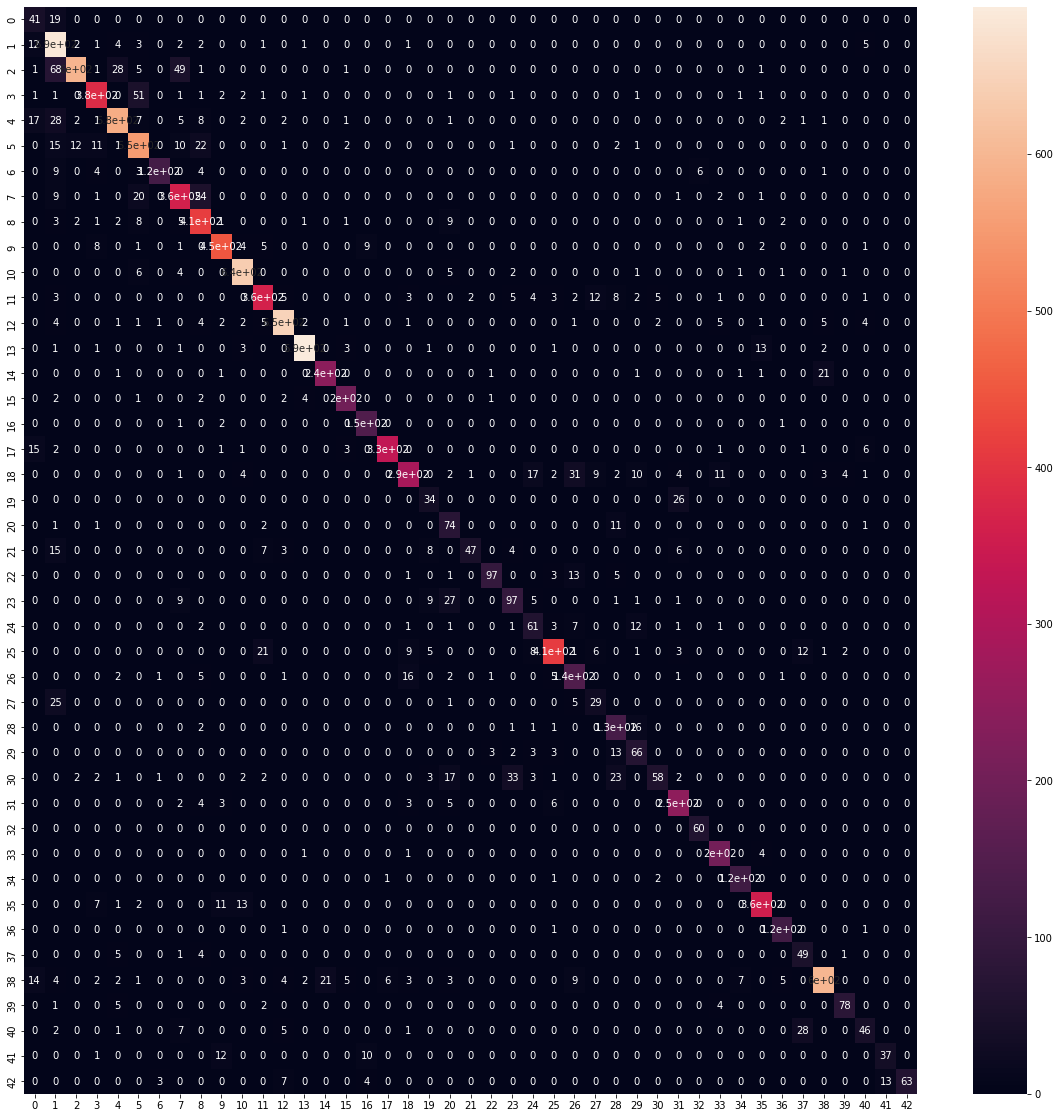

In [51]:
#confusion matric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot = True)

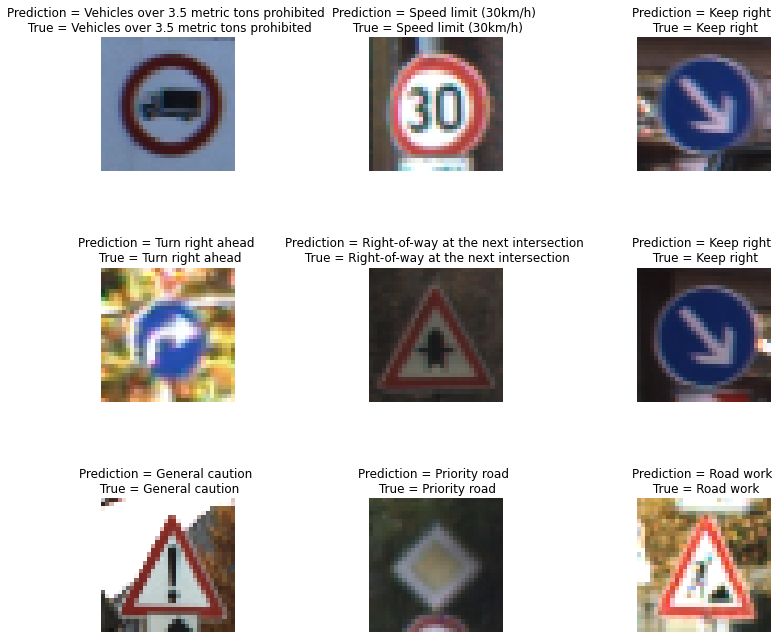

In [61]:
L = 3
W = 3
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'.format(class_dict[predicted_classes[i]],class_dict[y_true[i]]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)